# 이상치 확인 실습

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [3]:
tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [4]:
tips[['total_bill']].head(3)

,total_bill
0,16.99
1,10.34
2,21.01


## 1. ESD 이용한 이상치 확인

In [6]:
mean = np.mean(tips['total_bill'])
std = np.std(tips['total_bill'])
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

print(upper_limit, ',', lower_limit)

46.43839435626422 , -6.866509110362578


In [7]:
# 조건 필터링
cond = (tips['total_bill'] > upper_limit)
tips[cond]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


## 2. IQR을 이용한 이상치 확인 (boxplot)

<Axes: ylabel='total_bill'>

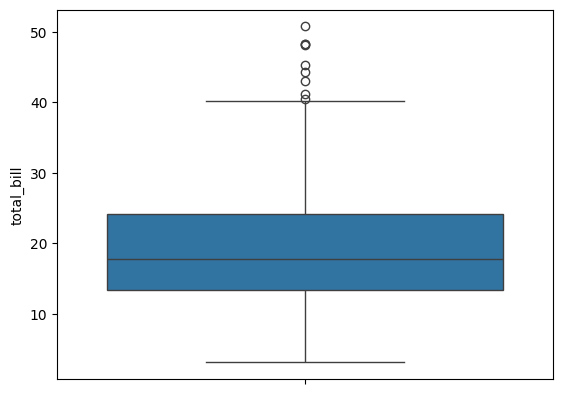

In [9]:
sns.boxplot(tips['total_bill'])

In [11]:
q1 = tips['total_bill'].quantile(0.25)
q3 = tips['total_bill'].quantile(0.75)
iqr = q3 - q1
upper_limit2 = q3 + 1.5 * iqr
lower_limit2 = q1 - 1.5 * iqr

print(q1, q3, iqr, upper_limit2, lower_limit2)

13.3475 24.127499999999998 10.779999999999998 40.29749999999999 -2.8224999999999945


In [13]:
# 조건 필터링
cond2 = (tips['total_bill'] > upper_limit2)
tips[cond2]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4
